In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder

In [71]:
df =pd.read_csv("bank_test.csv", sep=";")


In [86]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,1,no,1787,0,0,1,19,10,79,1,-1,0,unknown,0
1,33,services,1,2,no,4789,1,1,1,11,5,220,1,339,4,failure,0
2,35,management,0,3,no,1350,1,0,1,16,4,185,1,330,1,failure,0
3,30,management,1,3,no,1476,1,1,0,3,6,199,4,-1,0,unknown,0
4,59,blue-collar,1,2,no,0,1,0,0,5,5,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,1,2,no,-333,1,0,1,30,7,329,5,-1,0,unknown,0
4517,57,self-employed,1,3,yes,-3313,1,1,0,9,5,153,1,-1,0,unknown,0
4518,57,technician,1,2,no,295,0,0,1,19,8,151,11,-1,0,unknown,0
4519,28,blue-collar,1,2,no,1137,0,0,1,6,2,129,4,211,3,other,0


In [112]:
df.loc[df["month"] == "jan", "month"] = 1
df.loc[df["month"] == "feb", "month"] = 2
df.loc[df["month"] == "mar", "month"] = 3
df.loc[df["month"] == "apr", "month"] = 4
df.loc[df["month"] == "may", "month"] = 5
df.loc[df["month"] == "jun", "month"] = 6
df.loc[df["month"] == "jul", "month"] = 7
df.loc[df["month"] == "aug", "month"] = 8
df.loc[df["month"] == "sep", "month"] = 9
df.loc[df["month"] == "oct", "month"] = 10
df.loc[df["month"] == "nov", "month"] = 11
df.loc[df["month"] == "dec", "month"] = 12

df.loc[df["contact"] == "cellular", "contact"] = 1
df.loc[df["contact"] == "unknown", "contact"] = 0
df.loc[df["contact"] == "telephone", "contact"] = 2

df.loc[df["y"] == "yes", "y"] = 1
df.loc[df["y"] == "no", "y"] = 0

df.loc[df["loan"] == "yes", "loan"] = 1
df.loc[df["loan"] == "no", "loan"] = 0

df.loc[df["housing"] == "yes", "housing"] = 1
df.loc[df["housing"] == "no", "housing"] = 0

df.loc[df["education"] == "primary", "education"] = 1
df.loc[df["education"] == "secondary", "education"] = 2
df.loc[df["education"] == "tertiary", "education"] = 3
df.loc[df["education"] == "unknown", "education"] = 0

df.loc[df["marital"] == "divorced", "marital"] = 2

df.loc[df["marital"] == "married", "marital"] = 1
df.loc[df["marital"] == "single", "marital"] = 0

df=df.apply(LabelEncoder().fit_transform)

In [95]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing       int64
loan          int64
contact       int64
day           int64
month         int64
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [101]:
df["month"]=df["month"].astype(int)
df["contact"]=df["contact"].astype(int)
df["y"]=df["y"].astype(int)
df["loan"]=df["loan"].astype(int)
df["housing"]=df["housing"].astype(int)
df["education"]=df["education"].astype(int)
df["marital"]=df["marital"].astype(int)


In [102]:
cordf = df.corr()

/var/folders/dc/t9jrhcsn3x74_sxd34f1nhrc0000gn/T/ipykernel_93377/388377152.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cordf = df.corr()


In [103]:
df.corr()

/var/folders/dc/t9jrhcsn3x74_sxd34f1nhrc0000gn/T/ipykernel_93377/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
age,1.000000,0.381485,-0.199345,0.083820,-0.193888,-0.011250,0.110989,-0.017853,0.073764,-0.002367,-0.005148,-0.008894,-0.003511,0.045092
marital,0.381485,1.000000,-0.109124,-0.024971,0.029851,0.045210,-0.037977,-0.008794,0.051565,-0.006619,-0.005915,-0.017050,-0.038028,-0.015042
education,-0.199345,-0.109124,1.000000,0.035731,-0.031251,0.016102,0.078797,0.013508,0.078297,-0.003246,0.019268,0.006886,0.027320,0.050265
balance,0.083820,-0.024971,0.035731,1.000000,-0.050227,-0.071349,0.030763,-0.008677,0.099872,-0.015950,-0.009976,0.009437,0.026196,0.017905
housing,-0.193888,0.029851,-0.031251,-0.050227,1.000000,0.018451,-0.210574,-0.031291,-0.170922,0.015740,-0.003574,0.116893,0.038621,-0.104683
loan,-0.011250,0.045210,0.016102,-0.071349,0.018451,1.000000,0.002610,-0.004879,0.039226,-0.004997,0.017120,-0.031086,-0.022115,-0.070517
contact,0.110989,-0.037977,0.078797,0.030763,-0.210574,0.002610,1.000000,0.063496,0.165790,-0.005027,0.007929,0.210690,0.173410,0.125882
day,-0.017853,-0.008794,0.013508,-0.008677,-0.031291,-0.004879,0.063496,1.000000,0.080436,-0.024629,0.160706,-0.094352,-0.059114,-0.011244
month,0.073764,0.051565,0.078297,0.099872,-0.170922,0.039226,0.165790,0.080436,1.000000,-0.000282,0.059214,-0.112003,-0.037410,0.023335
duration,-0.002367,-0.006619,-0.003246,-0.015950,0.015740,-0.004997,-0.005027,-0.024629,-0.000282,1.000000,-0.068382,0.010380,0.018080,0.401118


<Axes: >

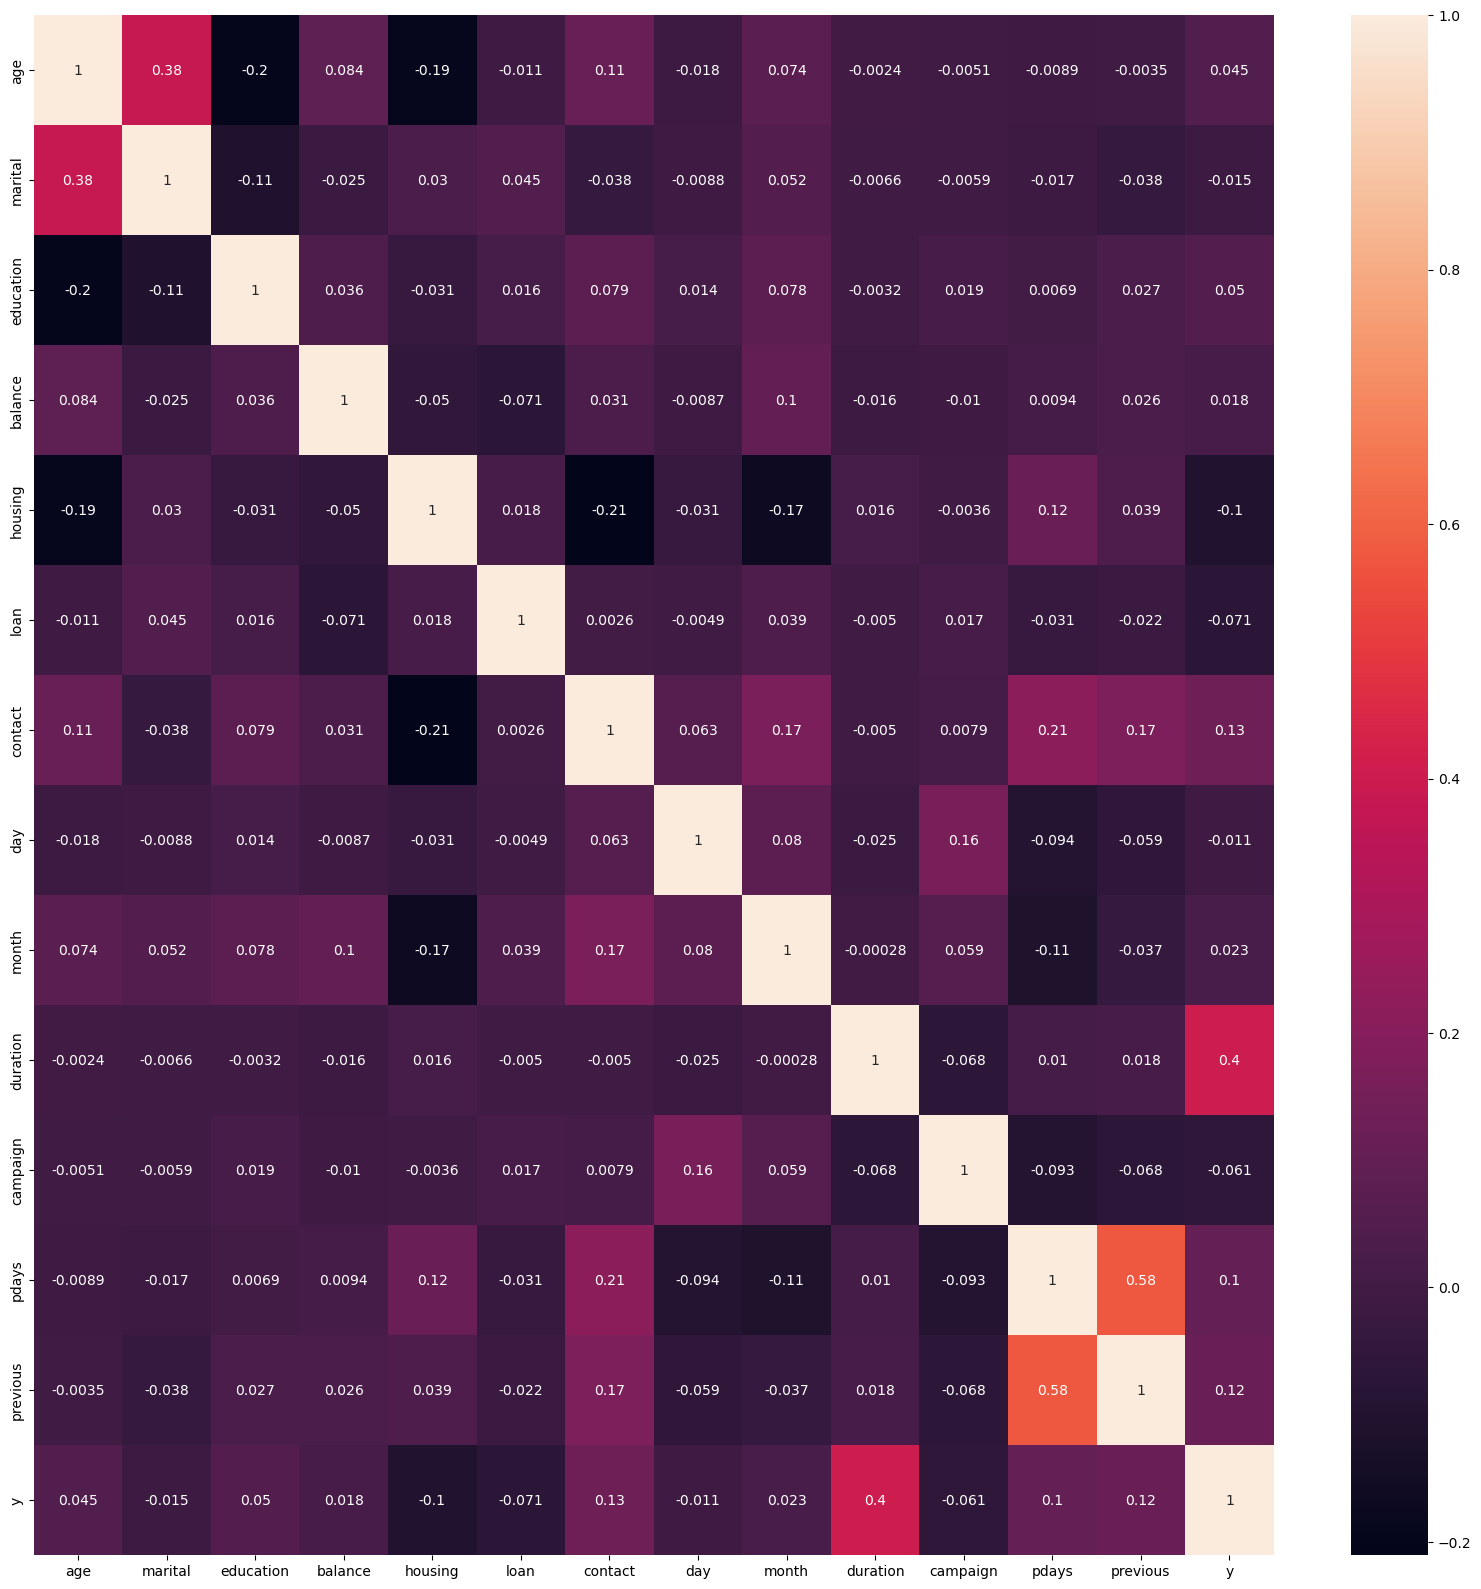

In [192]:
plt.figure(figsize = (20,20))
sns.heatmap(cordf, annot=True)

In [105]:
df.describe

<bound method NDFrame.describe of       age            job  marital  education default  balance  housing  loan  \
0      30     unemployed        1          1      no     1787        0     0   
1      33       services        1          2      no     4789        1     1   
2      35     management        0          3      no     1350        1     0   
3      30     management        1          3      no     1476        1     1   
4      59    blue-collar        1          2      no        0        1     0   
...   ...            ...      ...        ...     ...      ...      ...   ...   
4516   33       services        1          2      no     -333        1     0   
4517   57  self-employed        1          3     yes    -3313        1     1   
4518   57     technician        1          2      no      295        0     0   
4519   28    blue-collar        1          2      no     1137        0     0   
4520   44   entrepreneur        0          3      no     1136        1     1   

     

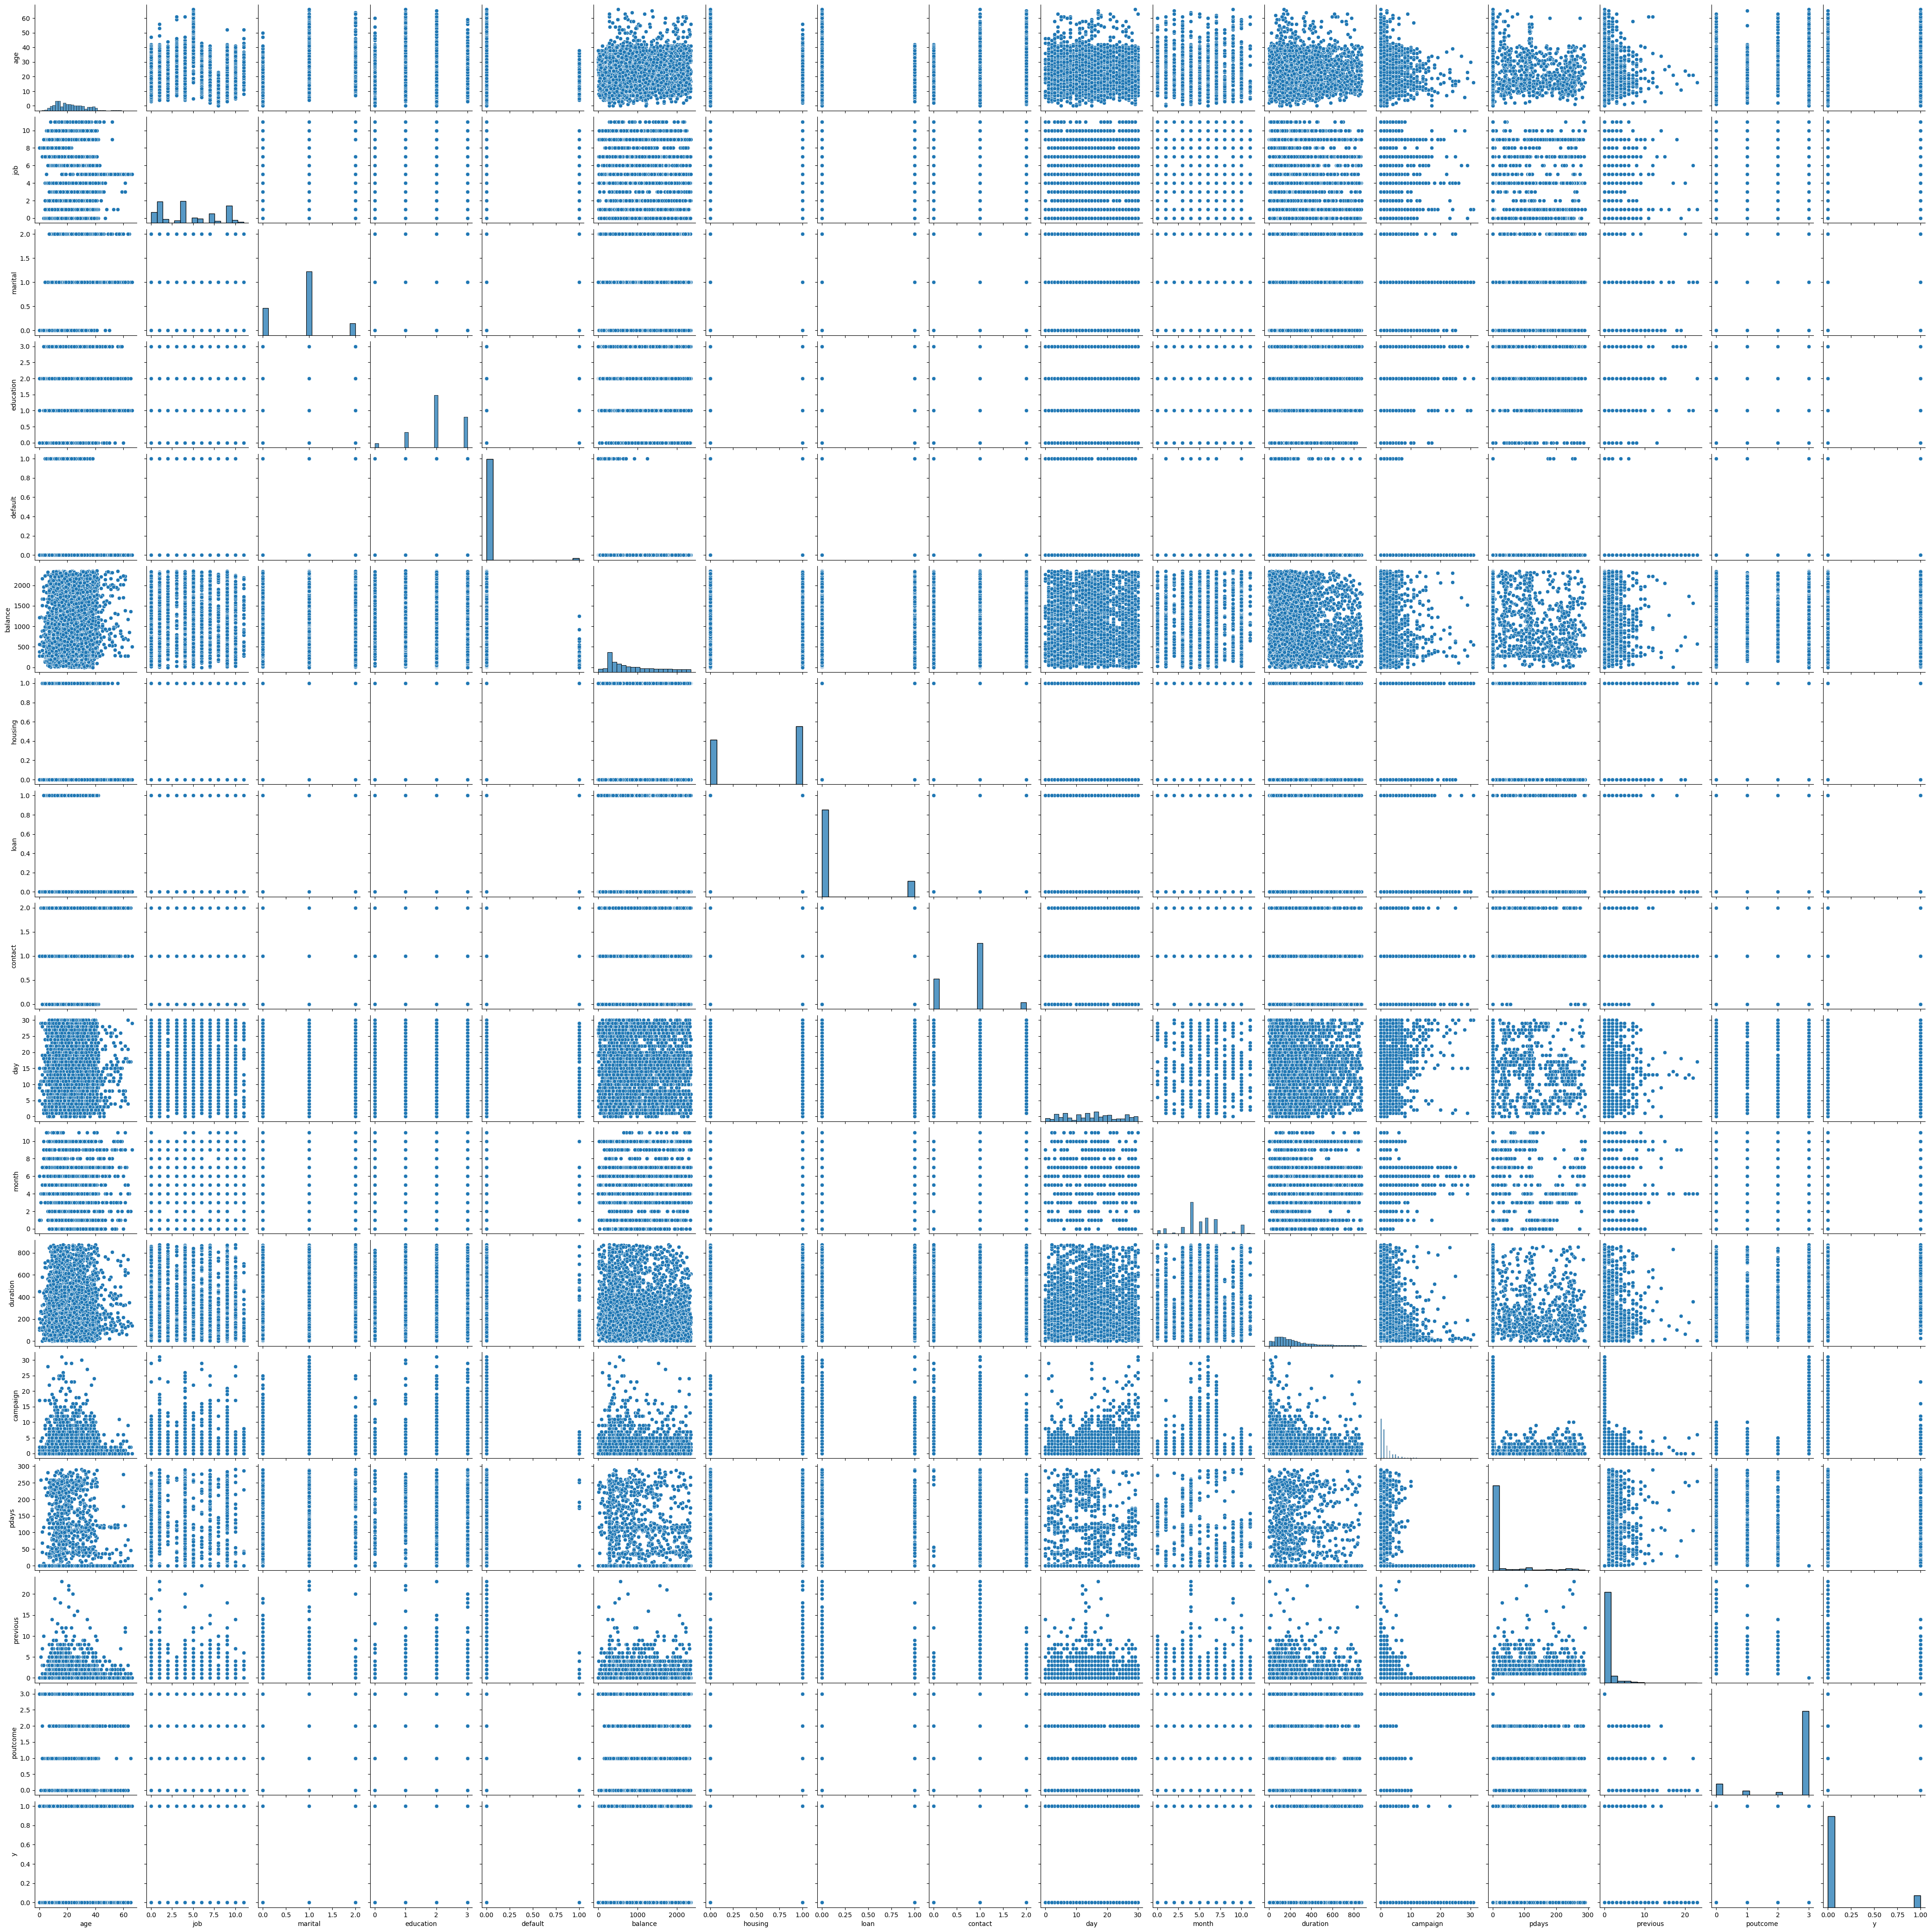

In [137]:
sns.pairplot(df)

In [210]:
x=df.drop(["y","housing"], axis=1)

y=df["y"]


scaler= StandardScaler().fit(x)

x_scaled=scaler.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30)


lr = LogisticRegression(max_iter=500)

model_lr=lr.fit(x_train,y_train)
y_pred = model_lr.predict(x_test)


In [154]:
df["y"].value_counts()

0    4000
1     521
Name: y, dtype: int64

In [231]:
print(lr.score(x_train,y_train))
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

0.83734375
0.910625
[[694  96]
 [ 47 763]]


In [232]:
mlp = MLPClassifier( activation = "logistic", hidden_layer_sizes = (100,100),max_iter=500)
model_mlp = mlp.fit(x_train,y_train)
y_pred = model_mlp.predict(x_test)

/Users/jamesmulyono/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [233]:
print(model_mlp.score(x_train,y_train))
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

0.9509375
0.915
[[712  78]
 [ 58 752]]


In [234]:
model_rf = RandomForestRegressor( )

model_rf.fit(x_train, y_train)

print(model_rf.score(x_train, y_train))
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

0.9700276448012187
0.915
[[712  78]
 [ 58 752]]


In [189]:
sm = SMOTE()

x_bal, y_bal = sm.fit_resample(x, y)

In [227]:

scaler = StandardScaler().fit(x_bal)
x_scaled = scaler.transform(x_bal)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_bal, test_size = 0.20)


lr = LogisticRegression(max_iter=500)

model_lr=lr.fit(x_train,y_train)
y_pred = model_lr.predict(x_test)


In [230]:
print(lr.score(x_train,y_train))
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

0.83734375
0.910625
[[694  96]
 [ 47 763]]


In [ ]:
mlp = MLPClassifier( activation = "logistic", hidden_layer_sizes = (1000,1000),max_iter=500)
model_mlp = mlp.fit(x_train,y_train)
y_pred = model_mlp.predict(x_test)

In [ ]:
print(model_mlp.score(x_train,y_train))
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

In [213]:
model_rf = RandomForestRegressor( )

model_rf.fit(x_train, y_train)

print(model_rf.score(x_train, y_train))
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

0.9691045888080435
0.8358333333333333
[[490  88]
 [109 513]]


In [165]:
#get rid of outliers + drop features